# Приоритизация гипотез, A/B-тестирование.

Вместе с отделом маркетинга крупного интернет-магазина вы подготовили список гипотез для увеличения выручки.
**Цель исследования:** Приоритизайия гипотез, запуск A/B-теста и анализ результатов.

**Входные данные:**

Данные для первой части:

Файл hypothesis
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл orders
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Для достижения цели решим следующие **задачи:**
1. Загрузим данные и подготовим их к анализу.
2. Приоритизируем гипотезы.
- Примененим фреймворк ICE для приоритизации гипотез.
- Примененим фреймворк RICE для приоритизации гипотез.
- Как изменилась приоритизация гипотез при применении RICE вместо ICE.

3. Проанализируем A/B-тест
- Построем график кумулятивной выручки по группам.
- Построем график кумулятивного среднего чека по группам.
- Построем график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построем график кумулятивного среднего количества заказов на посетителя по группам.
- Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построем точечный график количества заказов по пользователям.
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
- Построем точечный график стоимостей заказов.
- Посчитаем 95-й и 99-й перцентили стоимости заказов.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- Примем решение по результатам теста и объясним его.

4. Напишем общий вывод.

**СОДЕРЖАНИЕ**
1. [Загрузка данных и подготовка их к анализу](#1)
2. [Приоритизация гипотез.](#2)
3. [Анализ A/B-теста](#3)
4. [Общий вывод](#4)

### Загрузка данных и подготовка их к анализу
<a id="1"></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**Загрузим данныею. Чтобы даты выгрузились корректно, добавим параметр parse_dates:**

In [ ]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv', parse_dates=['date']),
        pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv', parse_dates=['date']),
        pd.read_csv('visitors.csv', parse_dates=['date'])
    )

**Напишем функцию для просмотра информации о датасетах:**

In [ ]:
def df_inform(df):
    display(df.head())
    print('---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------')
    print(df.info())
    print('----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------')
    display(df.describe())
    print('----------------------------------------ПРОПУСКИ-----------------------------------------------------')
    print(df.isna().sum())
    print('----------------------------------------ДУБЛИКАТЫ----------------------------------------------------')
    print(df.duplicated().sum())

**Посмотрим информацию о датасете hypothesis:**

In [ ]:
df_inform(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


----------------------------------------ПРОПУСКИ-----------------------------------------------------
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


**Проверим на неявные дубликаты столбец Hypothesis:**

In [ ]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

**Датасет hypothesis состоит из 9 строк (гипотез). Типы данных соответствуют содержимому. Наименования столбцов необходимо привести в соответствии с хорошим стилем к нижнему регистру. Пропуски в данных, явные и не явные дубликаты отсутствуют.**

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()

In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Посмотрим информацию о датасете orders:**

In [ ]:
df_inform(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


----------------------------------------ПРОПУСКИ-----------------------------------------------------
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


**Проверим на наличие неявных дубликатов столбец group:**

In [ ]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

**Датасет orders состоит из 1197 строк. Типы данных соответствуют содержимому. Наименования столбцов необходимо привести в соответствии с хорошим стилем - привести к нижнему регистру и добавить нижнее подчеркивание. Пропуски в данных, явные и неявные дубликаты отсутствуют.**

In [ ]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Посмотрим информацию о датасете visitors:**

In [ ]:
df_inform(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---------------------------------------ИНФОРМАЦИЯ----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


----------------------------------------ПРОПУСКИ-----------------------------------------------------
date        0
group       0
visitors    0
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


**Проверим на наличие неявных дубликатов столбец group:**

In [ ]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

**Датасет visitors состоит из 62 строк. Типы данных соответствуют содержимому. Наименования столбцов соответствуют хорошему стилю. Пропуски в данных, явные и не явные дубликаты отсутствуют.**

**Промежуточный вывод 1:**

В результате загрузки и предобработки данных:

Датасет **hypothesis** состоит из следующих столбцов:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Датасет состоит из 9 строк (гипотез). Типы данных соответствуют содержимому. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру. Пропуски в данных, явные и не явные дубликаты отсутствуют.

Датасет **orders** состоит из следующих столбцов:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет orders состоит из 1197 строк. Типы данных соответствуют содержимому. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру и добавили нижнее подчеркивание. Пропуски в данных, явные и неявные дубликаты отсутствуют.

Датасет **visitors** состоит из следующих столбцов:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Датасет visitors состоит из 62 строк. Типы данных соответствуют содержимому. Наименования столбцов соответствуют хорошему стилю. Пропуски в данных, явные и не явные дубликаты отсутствуют.

### Приоритизация гипотез
<a id="2"></a>

**Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета. ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:**

In [ ]:
#установим ширину столбца, чтобы были читаемы все гипотезы полностью
pd.options.display.max_colwidth = 150

In [ ]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 2)
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**При применении способа ICE самой приоритетной гипотезой стала "Запустить акцию, дающую скидку на товар в день рождения" при параметрах Impact — 9 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 9 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу).**

**Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета. RICE модификация ICE (R от англ. reach, «охват»):**

In [ ]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 2)
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**При применении способа RICE самой приоритетной гипотезой стала "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" при параметрах: Reach — 10 (скольких пользователей затронет изменение, которое вы хотите внести), Impact — 7 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 8 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу).**

**Промежуточный вывод 2:**

При применении способа **ICE** самой приоритетной гипотезой стала "Запустить акцию, дающую скидку на товар в день рождения" при параметрах Impact — 9 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 9 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу).

При применении способа **RICE** приоритизация изменилась в пользу гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" при параметрах: Reach — 10 (скольких пользователей затронет изменение, которое вы хотите внести), Impact — 7 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 8 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу). А гипотеза "Запустить акцию, дающую скидку на товар в день рождения" спустилась на 5 строку приоритета.

Изменение приоритета по способу RICE в отличии от ICE произошло из-за параметра Reach равному 10 баллам у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Это говорит о том, что данное изменение затронет максимальное количество пользователей. А у приоритетной гипотезы по ICE "Запустить акцию, дающую скидку на товар в день рождения" этот параметр равен 1 - минимальное количество пользователей затронет данное изменение.

### Анализ А/В-теста
<a id="3"></a>

#### Построим график кумулятивной выручки по группам.Сделаем выводы и предположения.

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


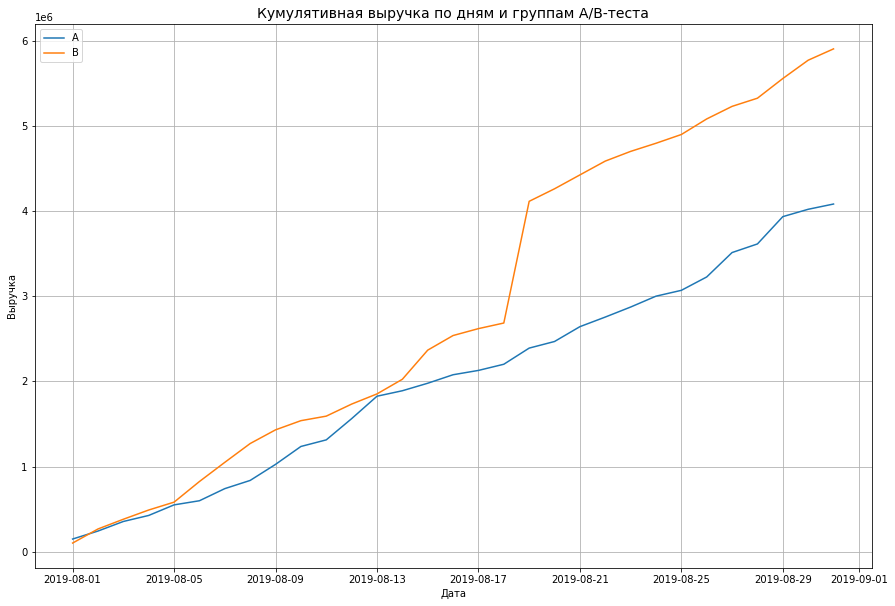

In [ ]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15, 10))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Кумулятивная выручка по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

**По графику кумулятивной выручки по дням и группам А/В теста видно:**

- группа B почти всё время опережает A
- резкий рывок 18–19 августа. На этих датах в группе B видно вертикальное «ступенькообразное» увеличение. По форме это похоже на 1–2 очень крупных заказа. После прыжка наклон кривой возвращается к исходному, поэтому прирост, похоже, объясняется именно единичным событием, а не стабильным повышением конверсии или среднего чека.
- динамика после выброса стабильная.

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

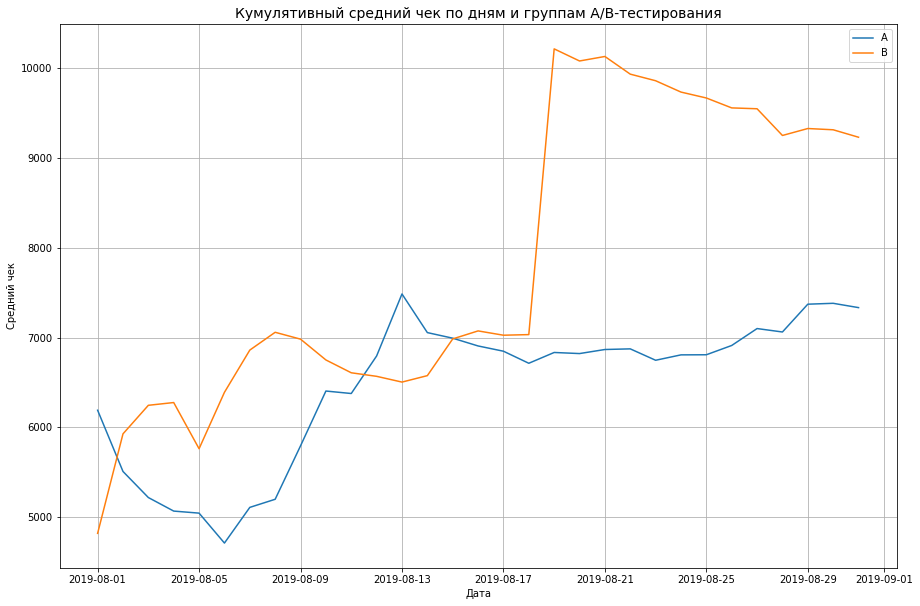

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

**По графику кумулятивного среднего чека по дням и группам А/В теста видно:**

- нестабильность величины среднего чека до 15.08 в обоих группах. Кривые меняются местами и неравномерны.
- с 15.08 величина среднего чека становится стабильной, плавной и к концу месяца постепенно увеличивается
- 17–18 августа у группы B резкий скачок более чем на 3 0000. После выброса средний чек в группе B постепенно «проседает», но остаётся выше A.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [ ]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b'])

merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


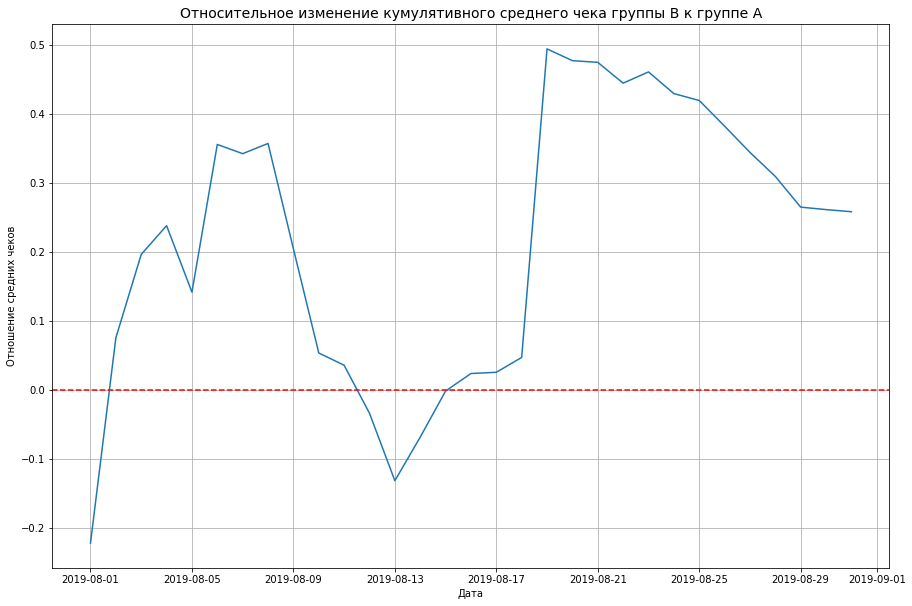

In [ ]:
plt.figure(figsize=(15, 10))

# отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b']/
          merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/
          merged_cumulative_revenue['orders_a'])-1)

plt.axhline(y=0, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.show()

**График относительного изменения кумулятивного среднего чека группы B к группе A** ведет себя нестабильно. Есть резкие скачки и спады, это всидетельствует о крупных заказах или выбросах.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

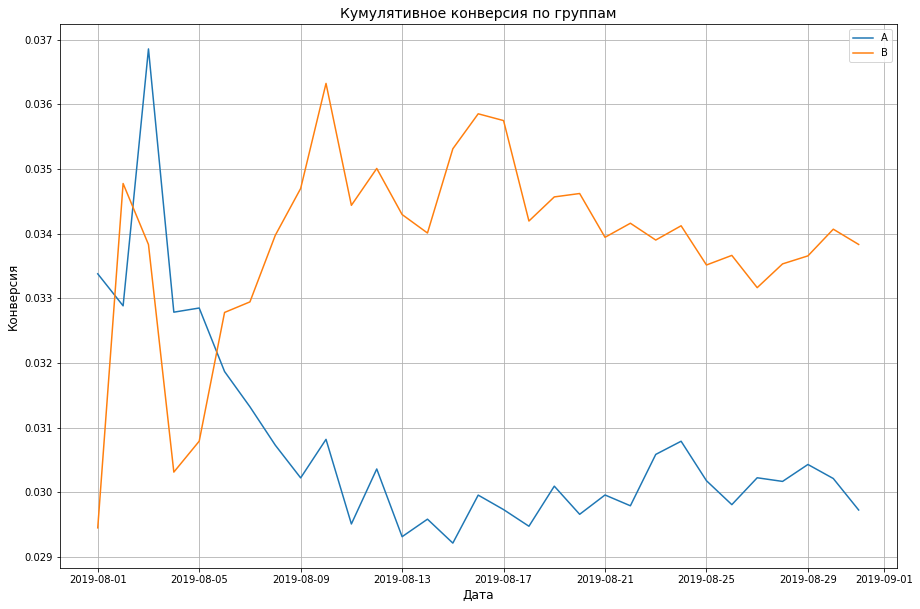

In [ ]:
# кумулятивная конверсия
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(15, 10))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.grid(visible=True)
plt.title('Кумулятивное конверсия по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.legend()
plt.show()

На **графике кумулятивной конверсии по группам** видим, что в первые дни конверсия у группы А была выше, чем у В, но с 06.08 группы поменялись местами: конверсия группы А просела, а конверсия группы В выросла. Далее обе конверсии идут параллельно с незначительными колебаниями

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

In [ ]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b'])

merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


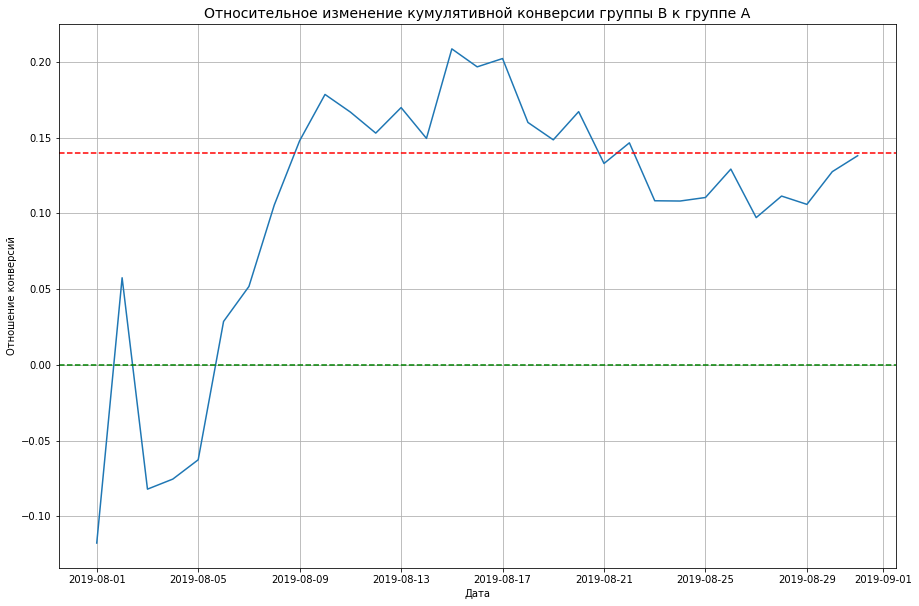

In [ ]:
plt.figure(figsize=(15, 10))

# отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b']/
         merged_cumulative_conversions['conversion_a']-1)


plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.14, color='red', linestyle='--')

plt.grid(visible=True)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Отношение конверсий')
plt.show()

На **графике относительного измененя кумулятивной конверсии группы В к группе А** видно что конверсия группы B лидирует по конверсии: прирост сначала колебался от 15% до 20% к концу месяца в районе 10-15%.

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [ ]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя
orders_count = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименуем столбцы
orders_count.columns = ['user_id', 'orders']
#выведем таблицу отсортиованную по убыванию кол-ва заказов
orders_count.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


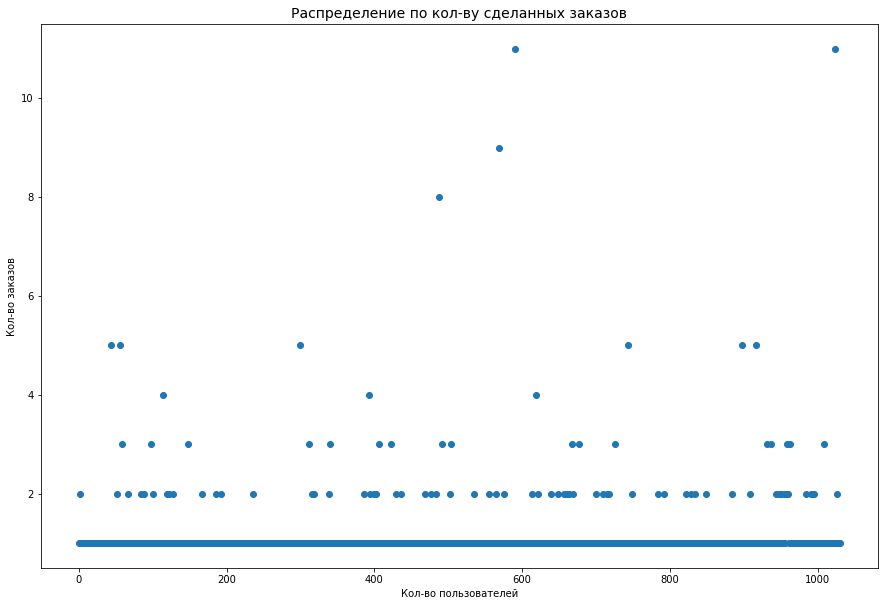

In [ ]:
x_values = pd.Series(range(0, len(orders_count)))

plt.figure(figsize=(15,10))

plt.scatter(x_values, orders_count['orders'])

plt.title('Распределение по кол-ву сделанных заказов', fontsize=14)
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.show()

По **точечному графику количества заказов по пользователям** видно, что:

- большинство делает только один заказ. Основная масса пользователей оформила ровно 1 покупку.
- частота заказов резко падает. Те, кто вернулся хотя бы раз, со второго на третий заказ возвращаются в 5–10 раз реже.
- есть «тяжёлый хвост» сверх-активных. Единичные пользователи сделали по 8–11 заказов — их стоит исключить из A/B-анализа, чтобы не искажать средние.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(orders_count['orders'], [95, 99]))

[2. 4.]


**То есть ≈ 95 % пользователей оформили ≤ 2 заказов, а лишь 1 % перешагнули отметку 4. Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.**

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [ ]:
orders[['visitor_id', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

,visitor_id,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


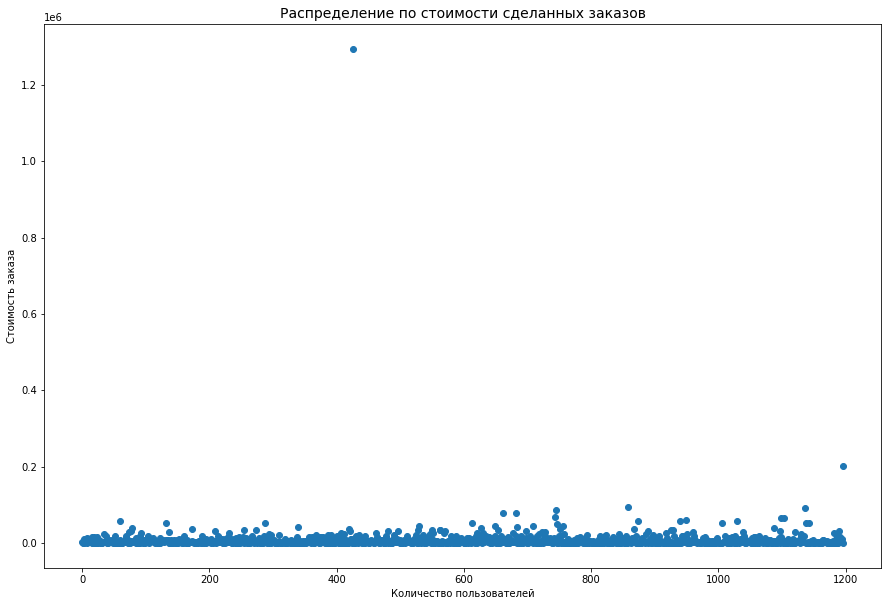

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15,10))

scattter_plot = plt.scatter(x_values, orders['revenue'])

plt.title('Распределение по стоимости сделанных заказов', fontsize=14)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.show()

По **точечному графику стоимости заказов** видно, что максимальная сумма заказа сильно превосходит все остальные заказы. Она завышает средний показатель.Стоит посмотреть на распределение стоимости заказов в пределах 210000.

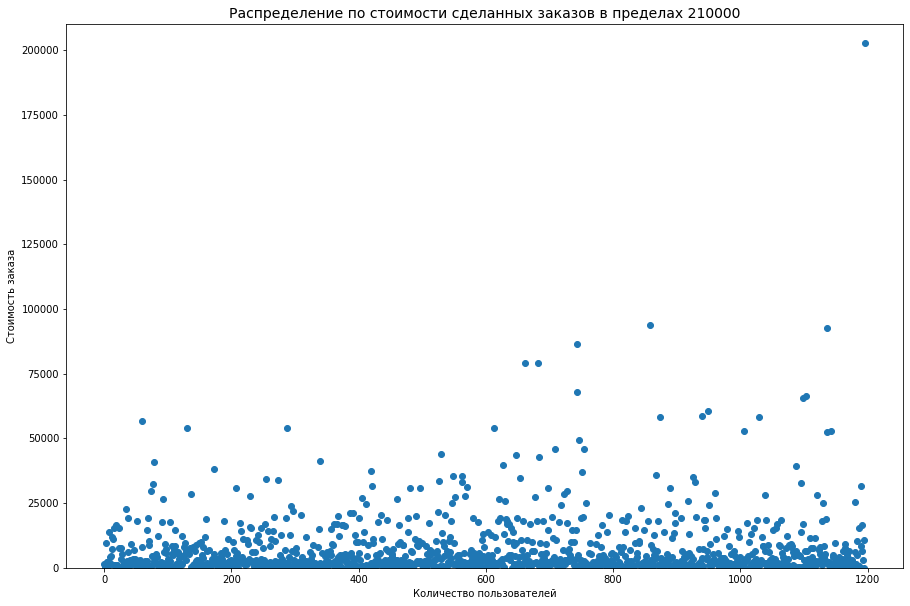

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 210000)

plt.title('Распределение по стоимости сделанных заказов в пределах 210000', fontsize=14)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.show()

**Обнаружили еще один сильно выбивающийся заказ. Основная доля стоимости заказов находится в пределах 25000. Тяжелый хвост находится свыше 50000. Более точно подскажет расчет перцентилей.**

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Рост от 28000 до 58233 всего за четыре процентных пункта показывает, что хвост распределения очень «тяжёлый»: 1 % заказов уже вдвое дороже, чем у границы 95-го перцентиля. Разумно выбрать 58000 (округлив 99-й перцентиль) за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.**

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [ ]:
# таблицы с данными по заказам на каждого пользователя
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_a.columns=['visitors_id','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_b.columns=['visitors_id','orders']

print(orders_by_users_a.head())
print(orders_by_users_b.head())

   visitors_id  orders
0      8300375       1
1     11685486       1
2     54447517       1
3     66685450       1
4     78758296       1
   visitors_id  orders
0      5114589       1
1      6958315       1
2      8300375       1
3     39475350       1
4     47206413       1


In [ ]:
sample_a = pd.concat([
            orders_by_users_a['orders'],
            pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
            name='orders')
            ],axis=0)
sample_b = pd.concat([
            orders_by_users_b['orders'],
            pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])),
            name='orders')
            ], axis=0)

**Нулевая гипотеза:** Различий в конверсии между группами нет

**Альтернативная гипотеза:** Различия в конверсиях между группами есть

**Коэффициент альфа:** 0.05

In [ ]:
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1]
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))
print('Отношение конверсии группы В к А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))

Значение p-value : 0.016792355056752608
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии группы В к А: 0.138


**По "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно, гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%- на столько конверсия группы В больше конверсии группы А**

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

**Нулевая гипотеза:** Различий в средних чеках между группами нет

**Альтернативная гипотеза:** Различия в средних чеках между группами есть

**Коэффициент альфа:** 0.05

In [ ]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))
print('Отношение среднего чека группы B к А: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))

Значение p-value : 0.7292909855432458
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7333.58
Средний чек группы B: 9230.88
Отношение среднего чека группы B к А: 1.26


**По "сырым" данным значение p-value = 0.73, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 26% - на столько сумма среднего чека группы В больше суммы среднего чека группы А.**

Причина высокой дисперсии почти наверняка в тяжёлом хвосте (единичные чеки > 58000 ₽). Их влияние мы видели на предыдущих графиках.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

In [ ]:
# собираем пользователей с большим кол-вом заказов
many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > 4]['visitors_id'],
     orders_by_users_b[orders_by_users_b['orders'] > 4]['visitors_id']],
    axis=0)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > 58000]['visitor_id']

# объединяем всё в один датафрейм
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
 
Кол-во анамальных пользователей:  15


In [ ]:
#отфильтруем данные в группе А
sample_a_filtered = pd.concat([
        orders_by_users_a[np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])),
        name='orders'),
        ], axis=0)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat([
        orders_by_users_b[np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])),
        name='orders')
        ], axis=0)

**Напомним вводные:**

**Нулевая гипотеза:** Различий в конверсии между группами нет

**Альтернативная гипотеза:** Различия в конверсиях между группами есть

**Коэффициент альфа:** 0.05

In [ ]:
result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
#ведем значение pvalue
print(f'Значение p-value : {result_3}')
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sample_b_filtered.mean()))
print('Отношение конверсии группы В к А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

Значение p-value : 0.014380135585307981
Отвергаем нулевую гипотезу
Средняя конверсия (очищенная) группы А: 2.8%
Средняя конверсия (очищенная) группы B: 3.3%
Отношение конверсии группы В к А, по очищенным данным: 0.153


**Для "очищенных" данных также справедливо утверждение о том, что конверсии разные и нулевая гипотеза верна.**

Эффект по конверсии устойчив. Очищение данных не изменило знак и даже слегка усилило значимость (p-value уменьшилась с 0.017 до 0.014).
Прирост B-варианта нельзя списать на «китов». Отношение +15 % сохранилась — значит, улучшение затрагивает «массовых» пользователей. Очистка затронула лишь 15 пользователей - теперь метрика отражает «нормальное» поведение.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

**Напомним вводные:**

**Нулевая гипотеза:** Различий в средних чеках между группами нет

**Альтернативная гипотеза:** Различия в средних чеках между группами есть

**Коэффициент альфа:** 0.05

In [ ]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]

#посчитаем средние значения
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()

print(f'Значение p-value : {result4}')

if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
#выведем всю необходимую информацию
print('Средний чек группы А (очищенный): {:.1f}'.format(mean_revenue_b))
print('Средний чек группы B (очищенный): {:.1f}'.format(mean_revenue_a))
print('Отношение среднего чека группы В к А, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a))

Значение p-value : 0.8509126191381939
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А (очищенный): 6399.8
Средний чек группы B (очищенный): 6436.8
Отношение среднего чека группы В к А, по очищенным данным: 0.99


**p-value = 0.85, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. После удаления «тяжёлых» пользователей средний чек двух групп практически одинаков (и даже на 1 % ниже в B).**

Разница +26%, которую мы видели ранее, была целиком обусловлена единичными «китами». Как только эти заказы убрали, эффект исчез.

#### Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Итоговое решение: останавливаем эксперимент и фиксируем победу группы B.**

Эксперимент достиг цели. Группа B увеличивает выручку за счёт роста конверсии.

**Промежуточный вывод 3:**

По графику кумулятивной выручки по дням и группам А/В теста видно:
- группа B почти всё время опережает A
- резкий рывок 18–19 августа. На этих датах в группе B видно вертикальное «ступенькообразное» увеличение. По форме это похоже на 1–2 очень крупных заказа. После прыжка наклон кривой возвращается к исходному, поэтому прирост, похоже, объясняется именно единичным событием, а не стабильным повышением конверсии или среднего чека.
- динамика после выброса стабильная.

По графику кумулятивного среднего чека по дням и группам А/В теста видно:
- нестабильность величины среднего чека до 15.08 в обоих группах. Кривые меняются местами и неравномерны.
- с 15.08 величина среднего чека становится стабильной, плавной и к концу месяца постепенно увеличивается
- 17–18 августа у группы B резкий скачок более чем на 3 0000. После выброса средний чек в группе B постепенно «проседает», но остаётся выше A.

График относительного изменения кумулятивного среднего чека группы B к группе A ведет себя нестабильно. Есть резкие скачки и спады, это свидетельствует о крупных заказах или выбросах.

На графике кумулятивной конверсии по группам видно, что в первые дни конверсия у группы А была выше, чем у В, но с 06.08 группы поменялись местами: конверсия группы А просела, а конверсия группы В выросла. Далее обе конверсии идут параллельно с незначительными колебаниями.

На графике относительного измененя кумулятивной конверсии группы В к группе А видно что конверсия группы B лидирует: прирост сначала колебался от 15% до 20% к концу месяца в районе 10-15%.

По точечному графику количества заказов по пользователям видно, что:
- большинство делает только один заказ. Основная масса пользователей оформила ровно 1 покупку.
- частота заказов резко падает. Те, кто вернулся хотя бы раз, со второго на третий заказ возвращаются в 5–10 раз реже.
- есть «тяжёлый хвост» сверх-активных. Единичные пользователи сделали по 8–11 заказов — их стоит исключить из A/B-анализа, чтобы не искажать средние.

95 % пользователей оформили ≤ 2 заказов, а лишь 1 % перешагнули отметку 4. Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

По точечному графику стоимости заказов видно, что максимальная сумма заказа сильно превосходит все остальные заказы. Она завышает средний показатель. Основная доля стоимости заказов находится в пределах 25000. Тяжелый хвост находится свыше 50000.

Рост от 28000 до 58233 всего за четыре процентных пункта показывает, что хвост распределения очень «тяжёлый»: 1 % заказов уже вдвое дороже, чем у границы 95-го перцентиля. Разумно выбрать 58000 (округлив 99-й перцентиль) за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

По "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно, гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%- на столько конверсия группы В больше конверсии группы А.

По "сырым" данным значение p-value = 0.73, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 26% - на столько сумма среднего чека группы В больше суммы среднего чека группы А.

Для "очищенных" данных также справедливо утверждение о том, что конверсии разные и нулевая гипотеза верна. Эффект по конверсии устойчив. Очищение данных не изменило знак и даже слегка усилило значимость (p-value снизилась с 0.017 до 0.014). Прирост B-варианта нельзя списать на «китов». Отношение +15 % сохранилась — значит, улучшение затрагивает «массовых» пользователей. Очистка затронула лишь 15 пользователей — доля < 1.5 %, теперь метрика отражает «нормальное» поведение.

p-value = 0.85, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. После удаления «тяжёлых» пользователей средний чек двух групп практически одинаков (и даже на 1 % ниже в B). Разница +26%, которую мы видели ранее, была целиком обусловлена единичными «китами». Как только эти заказы убрали, эффект исчез.

Итоговое решение: останавливаем эксперимент и фиксируем победу группы B. Эксперимент достиг цели. Группа B увеличивает выручку за счёт роста конверсии.

### Итоговый вывод
<a id="4"></a>

**Цель исследования достигнута.**

Для достижения цели исследования были решены следующие задачи:

1. Загружены и подготовлены к анализу данные.

Датасет hypothesis состоит из следующих столбцов:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Датасет состоит из 9 строк (гипотез). Типы данных соответствуют содержимому. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру. Пропуски в данных, явные и не явные дубликаты отсутствуют.

Датасет orders состоит из следующих столбцов:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет orders состоит из 1197 строк. Типы данных соответствуют содержимому. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру и добавили нижнее подчеркивание. Пропуски в данных, явные и неявные дубликаты отсутствуют.

Датасет visitors состоит из следующих столбцов:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Датасет visitors состоит из 62 строк. Типы данных соответствуют содержимому. Наименования столбцов соответствуют хорошему стилю. Пропуски в данных, явные и не явные дубликаты отсутствуют.

2. Приоритизированы гипотезы.
- Применен фреймворк ICE для приоритизации гипотез.

При применении способа ICE самой приоритетной гипотезой стала "Запустить акцию, дающую скидку на товар в день рождения" при параметрах Impact — 9 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 9 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу).

- применен фреймворк RICE для приоритизации гипотез.

При применении способа RICE приоритизация изменилась в пользу гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" при параметрах: Reach — 10 (скольких пользователей затронет изменение, которое вы хотите внести), Impact — 7 (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта), Confidence — 8 (насколько вы уверены, что это изменение повлияет на пользователей именно так) и Efforts — 5 (сколько стоит протестировать эту гипотезу). А гипотеза "Запустить акцию, дающую скидку на товар в день рождения" спустилась на 5 строку приоритета.

- получили ответ на вопрос: Как изменилась приоритизация гипотез при применении RICE вместо ICE.

Изменение приоритета по способу RICE в отличии от ICE произошло из-за параметра Reach равному 10 баллам у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Это говорит о том, что данное изменение затронет максимальное количество пользователей. А у приоритетной гипотезы по ICE "Запустить акцию, дающую скидку на товар в день рождения" этот параметр равен 1 - минимальное количество пользователей затронет данное изменение.

3. Проанализируем A/B-тест
- построен график кумулятивной выручки по группам.

По графику кумулятивной выручки по дням и группам А/В теста видно:

* группа B почти всё время опережает A
* резкий рывок 18–19 августа. На этих датах в группе B видно вертикальное «ступенькообразное» увеличение. По форме это похоже на 1–2 очень крупных заказа. После прыжка наклон кривой возвращается к исходному, поэтому прирост, похоже, объясняется именно  единичным событием, а не стабильным повышением конверсии или среднего чека.
* динамика после выброса стабильная.

- построен график кумулятивного среднего чека по группам.

По графику кумулятивного среднего чека по дням и группам А/В теста видно:

* нестабильность величины среднего чека до 15.08 в обоих группах. Кривые меняются местами и неравномерны.
* с 15.08 величина среднего чека становится стабильной, плавной и к концу месяца постепенно увеличивается
* 17–18 августа у группы B резкий скачок более чем на 3 0000. После выброса средний чек в группе B постепенно «проседает», но остаётся выше A.

- построен график относительного изменения кумулятивного среднего чека группы B к группе A.

График относительного изменения кумулятивного среднего чека группы B к группе A ведет себя нестабильно. Есть резкие скачки и спады, это свидетельствует о крупных заказах или выбросах.

- построен график кумулятивного среднего количества заказов на посетителя по группам.

На графике кумулятивной конверсии по группам видно, что в первые дни конверсия у группы А была выше, чем у В, но с 06.08 группы поменялись местами: конверсия группы А просела, а конверсия группы В выросла. Далее обе конверсии идут параллельно с незначительными колебаниями.

- построен график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

На графике относительного измененя кумулятивной конверсии группы В к группе А видно что конверсия группы B лидирует: прирост сначала колебался от 15% до 20% к концу месяца в районе 10-15%.

- построен точечный график количества заказов по пользователям.

По точечному графику количества заказов по пользователям видно, что:
* большинство делает только один заказ. Основная масса пользователей оформила ровно 1 покупку.
* частота заказов резко падает. Те, кто вернулся хотя бы раз, со второго на третий заказ возвращаются в 5–10 раз реже.
* есть «тяжёлый хвост» сверх-активных. Единичные пользователи сделали по 8–11 заказов — их стоит исключить из A/B-анализа, чтобы не искажать средние.

- посчитан 95-й и 99-й перцентили количества заказов на пользователя.

95 % пользователей оформили ≤ 2 заказов, а лишь 1 % перешагнули отметку 4. Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

- построен точечный график стоимостей заказов.

По точечному графику стоимости заказов видно, что максимальная сумма заказа сильно превосходит все остальные заказы. Она завышает средний показатель. Основная доля стоимости заказов находится в пределах 25000. Тяжелый хвост находится свыше 50000.

- посчитан 95-й и 99-й перцентили стоимости заказов.

Рост от 28000 до 58233 всего за четыре процентных пункта показывает, что хвост распределения очень «тяжёлый»: 1 % заказов уже вдвое дороже, чем у границы 95-го перцентиля. Разумно выбрать 58000 (округлив 99-й перцентиль) за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

- посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

По "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно, гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%- на столько конверсия группы В больше конверсии группы А.

- посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

По "сырым" данным значение p-value = 0.73, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 26% - на столько сумма среднего чека группы В больше суммы среднего чека группы А.

- посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Для "очищенных" данных также справедливо утверждение о том, что конверсии разные и нулевая гипотеза верна. Эффект по конверсии устойчив. Очищение данных не изменило знак и даже слегка усилило значимость (p-value снизилась с 0.017 до 0.014). Прирост B-варианта нельзя списать на «китов». Отношение +15 % сохранилась — значит, улучшение затрагивает «массовых» пользователей. Очистка затронула лишь 15 пользователей — доля < 1.5 %, теперь метрика отражает «нормальное» поведение.

- посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

p-value = 0.85, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. После удаления «тяжёлых» пользователей средний чек двух групп практически одинаков (и даже на 1 % ниже в B). Разница +26%, которую мы видели ранее, была целиком обусловлена единичными «китами». Как только эти заказы убрали, эффект исчез.

- принято решение по результатам теста.

Останавливаем эксперимент и фиксируем победу группы B. Эксперимент достиг цели. Группа B увеличивает выручку за счёт роста конверсии.

4. Написан общий вывод.

**Приоритизована гипотеза:** "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

**По результатам А/В теста принято решение:** Останавливить эксперимент и зафиксировать победу группы B.